In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.impute import SimpleImputer    # TO handle NAN values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder   # To handle Categorical Data
from sklearn.preprocessing import StandardScaler   # For feature scaling
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("titanic.csv", sep=(","))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping Useless Data

In [8]:
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
df.shape

(891, 9)

##  Data Types

In [10]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
# df[["Pclass", "Sex", "Cabin"]] = df[["Pclass", "Sex", "Cabin"]].astype("category" )

In [12]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

##  Null Values

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In column "Cabin" almost all values are NULL, So we have to remove the complete Column.

In [14]:
df = df.drop("Cabin", axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Coulmn "Survived" is our Traget data and all other columns are like Feeding data of model.

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
x = df.Age.values.reshape(-1, 1)
x

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [  nan],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [  nan],
       [31.  ],
       [  nan],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [  nan],
       [19.  ],
       [  nan],
       [  nan],
       [40.  ],
       [  nan],
       [  nan],
       [66.  ],
       [28.  ],
       [42.  ],
       [  nan],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [  nan],
       [ 3.  ],
       [19.  ],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [  nan],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [17]:
# Filling NAN values in Age column using Imputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(x)
x_imp = imp.transform(x)
x_imp

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [18]:
df.Age = x_imp
df.Age = df.Age.astype("int64")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
df["Embarked"] = df["Embarked"].fillna(method="ffill")

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


So all NULL values have been removed

##  Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_enc = encoder.fit_transform(df.Sex)
sex = x_enc.reshape(-1, 1)
df["Sex"] = sex
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [62]:
x = df.iloc[:, 1:7]
y = df.iloc[:, 0]

###  When we have to Perform Normalization, Standardization

If data is already normalized ten perform Standardization
 Mean first perform Normalization then Standardization

## Normalization

Used to rescale the values in 0 to 1 range

In [24]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))
x_mms = mms.fit_transform(x)
x_mms

array([[1.        , 1.        , 0.275     , 0.125     , 0.        ,
        0.01415106],
       [0.        , 0.        , 0.475     , 0.125     , 0.        ,
        0.13913574],
       [1.        , 0.        , 0.325     , 0.        , 0.        ,
        0.01546857],
       ...,
       [1.        , 0.        , 0.3625    , 0.125     , 0.33333333,
        0.04577135],
       [0.        , 1.        , 0.325     , 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 0.4       , 0.        , 0.        ,
        0.01512699]])

## Standardization

Arange values to mean=0, and STD=1

In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_ss = ss.fit_transform(x_mms)   # Results are same even if i give x_mms(result of Normalization). Why???
x_ss

array([[ 0.82737724,  0.73769513, -0.58004441,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693, -1.35557354,  0.65011226,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724, -1.35557354, -0.27250525, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724, -1.35557354, -0.04185087,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693,  0.73769513, -0.27250525, -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724,  0.73769513,  0.18880351, -0.4745452 , -0.47367361,
        -0.49237783]])

## Binarizing

Transform data to 1, 0 using a treshold values mostly 0

In [26]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.0)
x_bn = bn.fit_transform(x)
x_bn

array([[1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       ...,
       [1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.]])

## Mean Removal

In [70]:
from sklearn.preprocessing import scale
sc = scale(x)
sc.mean(axis=0)

array([-8.77213254e-17, -1.15632656e-16, -7.97466595e-18,  4.38606627e-17,
        5.38289951e-17,  3.98733297e-18])

## Visualizing Co-relation

In [63]:
cor = df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.335071,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.082533,-0.114631,-0.245489,-0.182333
Age,-0.067809,-0.335071,0.082533,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.035322,0.083081,-0.114631,-0.232743,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.176744,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.093856,0.159651,0.216225,1.000000


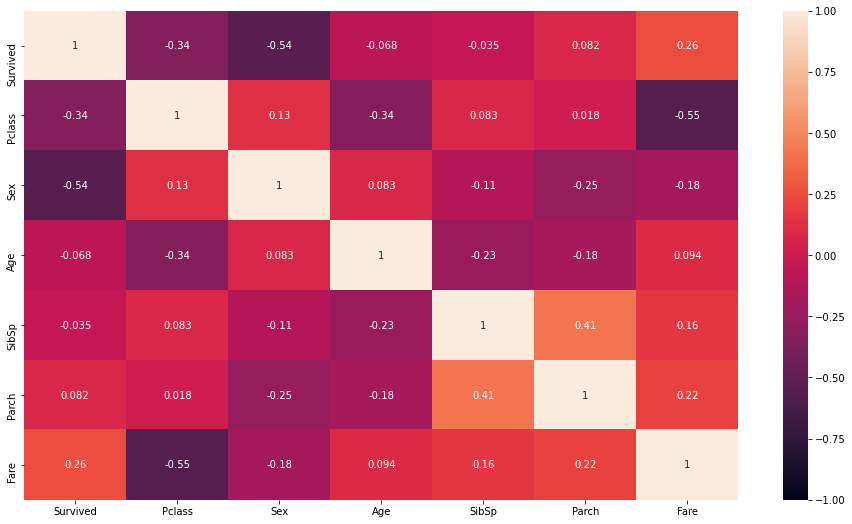

In [64]:
plt.figure(figsize=(16, 9))
sns.heatmap(data=cor, vmin=-1, vmax=1, annot=True)
plt.show()

## Distribution of Data

<Figure size 1152x648 with 0 Axes>

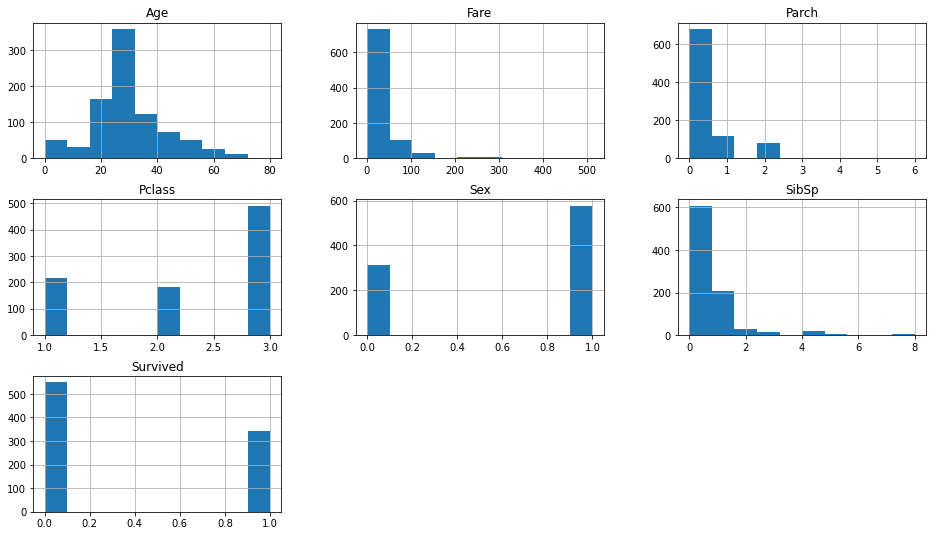

In [65]:
plt.figure(figsize=(16, 9))
df.hist(figsize=(16, 9))
plt.show()

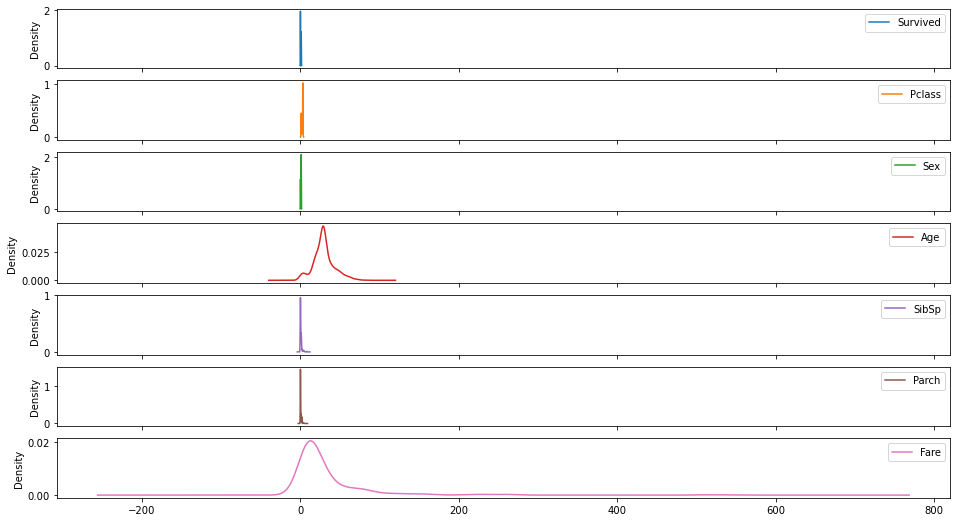

In [69]:
df.plot(kind="density", figsize=(16, 9), subplots=True, sharex=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1CFEDE80>,
      dtype=object)

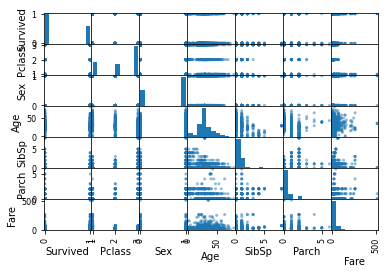

In [67]:
pd.plotting.scatter_matrix(df)

## Visualizing Outliers using Box Plot

Survived       AxesSubplot(0.125,0.125;0.0945122x0.755)
Pclass      AxesSubplot(0.238415,0.125;0.0945122x0.755)
Sex         AxesSubplot(0.351829,0.125;0.0945122x0.755)
Age         AxesSubplot(0.465244,0.125;0.0945122x0.755)
SibSp       AxesSubplot(0.578659,0.125;0.0945122x0.755)
Parch       AxesSubplot(0.692073,0.125;0.0945122x0.755)
Fare        AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

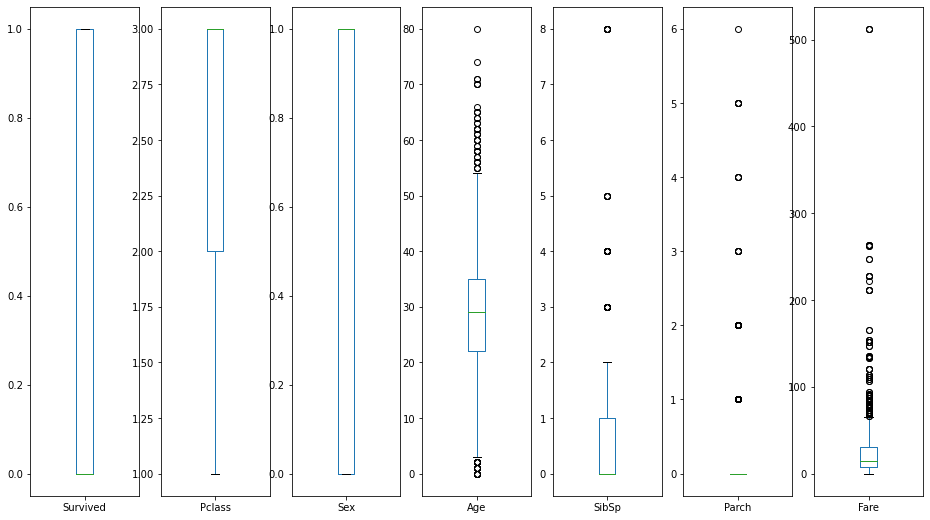

In [74]:
df.plot(kind="box", subplots=True, figsize=(16, 9), sharey=False)